In [1]:
import numpy as np
import pandas as pd

<font size=10><b>Intro to sklearn </b></font>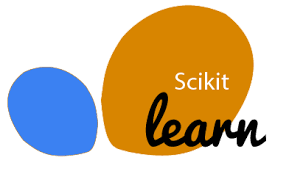

# Agenda:

1. Scikit-learn: background and scope
2. Sklearn API basics – Estimators and Transformers
3. Common sklearn paradigms
4. Advanced sklearn topics
5. Further reading

# Sklearn Background and Scope

## Background

> "Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.”

<a href = https://scikit-learn.org/stable/getting_started.html>– Scikit-learn documentation, “Getting Started”

<img src = "https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_digits_001.png" height = 500 width = 500> </img>
From https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

**Scikit-learn** (or **sklearn** for short) is the standard Python library used for common machine learning tasks.

It was originally developed by data scientist David Cournapeau in 2007 for the Google Summer of Code program.

It is a <a href=https://scipy.org/scikits.html> “scikit” </a> — an open-source extension to the **scipy** scientific computing library for Python — and uses NumPy behind the scenes for fast linear algebra and array manipulation.

**Scikit-learn** is built to interface well with other common Python libraries used in data science, such as:

* **NumPy**	(array operations) 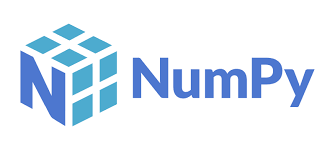
* **Matplotlib**	(plotting) 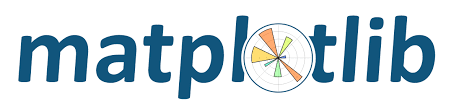
* **Pandas**	(dataframes) <img src = "https://www.seekpng.com/png/full/348-3481904_images-pandas-logo-pandas-python-logo.png" width = 100>
* **SciPy**	(scientific computing) 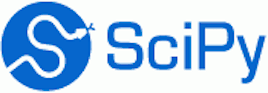

For example, we will see that sklearn estimators accept NumPy arrays or Pandas dataframes as input.

## Scope

The **scope of sklearn** includes common ML tasks such as **data preprocessing** and typical **supervised and unsupervised learning algorithms**:

* Data preprocessing (scaling data, train-test split, …)
* Supervised learning
    * Classification algorithms (Naïve Bayes, SVM, Random Forest, ...)
    * Regression algorithms (OLS Linear Regression, KNN Regressor, …)
* Unsupervised learning
    * Dimensionality reduction (PCA, NMF, Isomap, …)
    * Clustering algorithms (K-Means, DBScan, …)
* Model evaluation and selection

<div class="alert alert-info"><b>Note: The following topics are not in scope of sklearn:</b>

Models that we will learn in the continuation of the program:
* Time series (use <a href="http://statsmodels">statsmodels</a>)
* HMMs (use <a href="https://hmmlearn.readthedocs.io/en/latest/">hmmlearn</a>)
* Deep Learning (small exceptions) (use TensorFlow or PyTorch)
* GPU-accelerated ML (use TensorFlow/PyTorch or specialized libraries such as cuML)
* ML on “big data” (use <a href="https://spark.apache.org/docs/latest/api/python/"> PySpark</a>)

For explanations of why these are not included, see the <a href="https://scikit-learn.org/stable/faq.html"> sklearn Q&A</a>.</div>

# Sklearn API Basics

Scikit-learn comes pre-installed in Anaconda and Google Colab; otherwise install it with pip or conda:

In [2]:
!pip install scikit-learn

To import sklearn in your python code, simply use:

In [3]:
import sklearn

Let's look at versions:

In [4]:
sklearn.__version__

'1.2.2'

In [5]:
sklearn.show_versions()


System:
    python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
executable: /usr/bin/python3
   machine: Linux-6.1.58+-x86_64-with-glibc2.35

Python dependencies:
      sklearn: 1.2.2
          pip: 23.1.2
   setuptools: 67.7.2
        numpy: 1.23.5
        scipy: 1.11.4
       Cython: 3.0.6
       pandas: 1.5.3
   matplotlib: 3.7.1
       joblib: 1.3.2
threadpoolctl: 3.2.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 2
         prefix: libopenblas
       filepath: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so
        version: 0.3.20
threading_layer: pthreads
   architecture: Haswell

       user_api: openmp
   internal_api: openmp
    num_threads: 2
         prefix: libgomp
       filepath: /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
        version: None

       user_api: blas
   internal_api: openblas
    num_threads: 2
         p

## API General flow

In [ ]:
# examples of X and y :
# X : number of rooms, sq meters
X = [[4,120],[2,50],[3,70]] # more.... (it can take panda or numpy object)
y = [300000,100000,200000] # len(X) = len(y)



As discussed, the `sklearn` package is meant to be used for various tasks, inclusing data preprocessing, and data modeling of various sorts. We will use different **classes** to perform the different operations. What is nice about the package, is that it has a few methods that work for all of these classes. This is called "Duck typing":

> "Duck typing is a concept related to dynamic typing, where the type or the class of an object is less important than the methods it defines. When you use duck typing, you do not check types at all. Instead, you check for the presence of a given method or attribute."

These methods are:

* `.fit(X, y)`
* `.transform(X)`
* `.predict(X) / .predict_proba(X)`

Let's cover them one by one:

### `.fit(X[, y])`-

*input*: (usually) a dataset of independent variables, and sometimes, a dependent variable column.
*output*: None

this method is meant for learning parameters, regardless of whether this is for preprocessing or modeling. e.g. - it will learn the coefficients of a linear regression, it will learn the probabilies for Naive Bayes, etc... it does not change the given variables, but it keeps the parameters in the provided class instance.

**The `.fit()` method is used ONLY with the train set.**

### `.transform(X)` -
*input*: a dataset (can be partial)
*output*: a Numpy nD array, with the transformed data, (usually) in the same shape as the input.

What transform is meant to do, is apply the parameters learned on a specific dataset, on that same dataset of other datasets. Usually, the `.transform()` function will succeed the `.fit()` method, but sometimes we will be able to use it regardless.

We will use transformations as a part of the preprocessing phase, and some unsupervised learning problems.

**The `.transform()` method is used with the train set and other sets SEPERATELY.**

### `.predict(X) / .predict_proba(X)` -
*input*: A dataset (a matrix of independent features)
*output*: A numpy array in the same dimensions of:  (1, the number of rows in the input). the values will be the                                          prediction per sample. (in `.predict_proba()` there will be columns according to the number of classes)

The `.predict()` and `.predict_proba` methods, are meant to give us a prediction per row. In most Machine Learning **Classification models**, the prediction will be a probability of the sample belonging to a certain class.
With `.predict()`, the output will be a rounded number, which will indicate the predicted class. Using `.predict_proba()`, you can get the raw probabilities. We will discuss of the benefits of doing that in the future.

For **Regression** Machine learning models, there is no point of using `.predict_proba()`, as a output is not a probability. Always use `.predict()` for regression.

We use the prediction method on a fitted model. Meaning, a model instance has to be fitted, and only then we can predict with it.

**The `.predict() / .predict_proba` methods are used mostly with the TEST set, but there is no harm using it on the train set for monitoring.**

## Prediction - classification

We will now use the Diabetes example dataset and build a regression model to predict the progression of the disease.

In [33]:
from sklearn import datasets


iris = datasets.load_iris()

X = iris.data
y = iris.target
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Class exercise 1
#### Question 1
Use sklearn's iris dataset and build a `KNeighborsClassifier` classifier. Use the `fit()` and `predict()` functions. Use the documentation if necessary.

In [37]:
# your answer here
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X,y)
model.predict(X) # equal to y because we are predicting the set that we trained the model on

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Question 2
Use the `predict_proba()`. What is the difference between this function and the `predict()` function?

In [29]:
# your answer here
predict_proba_X = model.predict_proba(X)
# we get proba for each instances to be one of the three class. Sum element of each array = 1
# Before, we got an array of length 1. Not 100% accurate because even if the we evalute the model on the trained set, the model is sitll not 100% sure

#### Question 3
Use the classifiers `score()` function. What this function does?

In [28]:
# your answer here
model.score(X,y)
# it compares the prediction we get for X to the real result that is on y. It gives the accuracy of the model

0.96

#### Question 4
Now, instead of a KNN model use a Gaussian Naive Bayes classifier. Try to change as little code as possible

In [49]:
# your answer here
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()  # We keep the same structure as the previous classifier
model.fit(X,y)
model.predict(X)
#model.score(X,y)

0.45248868778280543

## Prediction - regression

We will now use the Diabetes example dataset and build a regression model to predict the progression of the disease.

In [38]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt

diab = datasets.load_diabetes()

X = diab.data
y = diab.target

### Class exercise 2
#### Question 1
Use sklearn's diabetes dataset and build a `DecisionTreeRegressor` regression model. Use the `fit()` and `predict()`. Use the documentation if necessary.

In [48]:
# your answer here
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X,y)
model.predict(X)
# model.score(X,y) we get 1
# CAUTION : high risk of overfitting

1.0

#### Question 2
Now, instead of a desicion tree model use a linear regression model. Try to change as little code as possible

In [47]:
# your answer here
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
model.predict(X)
# model.score(X,y) We get 0.51
# it tells how well the data fit a linear line (it gives the R^2)
# not necessary a risk of underfitting -->

0.5177484222203499

#### Question 3
try to predict the probabilities instead of predicting values. Does this work?

In [46]:
# your answer here
model.predict_proba(X)
# it does not work because we are on a regression model so we do not have probabilities

AttributeError: ignored

## Preprocessing
sklearn is not only for modeling. It has many tools and functions that are used in data preprocessing.
We call these object "transformerts", and they implement the `.fit(...)` and `.transform(...)` functions.

### Class exercise 3
We will perfrom the preprocessing steps on the independent features of the diabetes dataset

In [50]:
diab = datasets.load_diabetes()

X = diab.data
y = diab.target

In [67]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

#### Question 1
Use sklearn `MinMaxScaler` to transform `X`

In [69]:
# your answer here
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
scaler.transform(X)
# or we can do : scaler.fit_transform(X)

array([[0.66666667, 1.        , 0.58264463, ..., 0.28208745, 0.562217  ,
        0.43939394],
       [0.48333333, 0.        , 0.14876033, ..., 0.14104372, 0.22243673,
        0.16666667],
       [0.88333333, 1.        , 0.51652893, ..., 0.28208745, 0.49657763,
        0.40909091],
       ...,
       [0.68333333, 1.        , 0.28512397, ..., 0.24964739, 0.30503001,
        0.56060606],
       [0.28333333, 0.        , 0.49586777, ..., 0.39351199, 0.65702552,
        0.40909091],
       [0.28333333, 0.        , 0.0661157 , ..., 0.14104372, 0.46930394,
        0.51515152]])

#### Question 2
Explain what `MinMaxScaler`does

In [65]:
# your code here
# it transforms the data to be in a range of (0,1). IT IS DONE BY COLUMNS
# for (x,y), the minimum value of x will be 0, the max will be 1. Same for y.
# Other values are adapted according to the change of scale ( we will divide each data by the max of each COLUMNS)

#### Question 3
Now, instead of a `MinMaxScaler` use a `StandardScaler` to transform `X`. Try to change as little code as possible

In [66]:
# your answer here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaler.transform(X)

array([[ 0.80050009,  1.06548848,  1.29708846, ..., -0.05449919,
         0.41853093, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, ..., -0.83030083,
        -1.43658851, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, ..., -0.05449919,
         0.06015558, -0.54515416],
       ...,
       [ 0.87686984,  1.06548848, -0.33441002, ..., -0.23293356,
        -0.98564884,  0.32567395],
       [-0.9560041 , -0.93853666,  0.82123474, ...,  0.55838411,
         0.93616291, -0.54515416],
       [-0.9560041 , -0.93853666, -1.53537419, ..., -0.83030083,
        -0.08875225,  0.06442552]])

#### Question 4
Explain what `StandardScaler`does

In [ ]:
# your code here
# StandardScaler calculates the mean and standard deviation of the sample.
# Then it transformes each data to (x-u)/s with u = mean and s = std.
# MEAN OF THE DATA = 0 , VAR OF THE DATA = 1


<div class="alert alert-warning"><b>Note</b>: Some estimators also implement `.fit_transform(...)` and/or `.fit_predict(...)` as a shortcut for fitting and then transforming/predicting on the same input data.


⚠️ <b>Be careful!</b> You can get “data leakage” if you fit on test data. We will discuss what this means in lectures on preprocessing, overfitting and train-test splitting.</div>

<div class="alert alert-info"><b>Note:</b>
Sklearn estimators will accept Python lists, NumPy arrays, and Pandas DataFrames as input. You don’t usually need to worry about converting between these formats..</div>

### Preprocessing with no learning phase

Some preprocessing functionalities, require no learning stage, meaning the transformation is done per individual samples, and there are no parameters to be learned from the entire dataset. For that cause, we can use only `.transform()`

Let's see an example:

In [ ]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np
transformer = FunctionTransformer(np.log1p, validate=True)

### log transform the dataset

## Baseline models - sklearn Dummy models
sklearn provides a convenient framework for baseline models.
### Class exercise 4
#### Question 1
What is a baseline model?

In [70]:
# your answer here
# A baseline modle is a simple, easy to understand, quick to train and not complexe model.
# It serves as a default model to start with when building more complexe models.
# It gives a basic performance against which you can measure the effectiveness of more sophisticated models.

#### Question 2
Use sklearn `DummyClassifier` to build a baseline classifier for the iris dataset. use a 'uniform' strategy

In [71]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [79]:
# your answer here
from sklearn.dummy import DummyClassifier
model = DummyClassifier(strategy = 'uniform')
model.fit(X,y)
model.predict(X)
model.score(X,y)




0.004524886877828055

#### Question 3
Use sklearn `DummyClassifier` to build a baseline regressor for the diabetes dataset. Use the 'mean' strategy

In [75]:
diab = datasets.load_diabetes()

X = diab.data
y = diab.target

In [78]:
# your answer here
from sklearn.dummy import DummyRegressor
model = DummyRegressor(strategy = 'mean')
model.fit(X,y)
model.predict(X)
model.score(X,y)

0.0

## Common Sklearn Paradigms


In future lectures, proceed to show examples of using sklearn for some common machine learning tasks:

* Data preprocessing

* Supervised learning – classification

* Supervised learning – regression

* Unsupervised learning – dimensionality reduction

## Advanced Sklearn Topics

For the brave: you are recommended to self-study the topics below

* Controlling randomness in estimators with random_state (see <a href="https://scikit-learn.org/stable/common_pitfalls.html">10.3</a>)

* <a href="https://scikit-learn.org/stable/datasets.html">Sklearn datasets</a>  – sklearn provides common test datasets for ML tasks

* <a href="https://scikit-learn.org/stable/modules/model_persistence.html">Model persistence</a>: How to save and load trained models for later use

* Will be covered later in the course - <a href="https://scikit-learn.org/stable/getting_started.html#pipelines-chaining-pre-processors-and-estimators">Pipelines</a>, <a href="https://scikit-learn.org/stable/getting_started.html#model-evaluation">model evaluation</a>, and <a href="https://scikit-learn.org/stable/getting_started.html#automatic-parameter-searches">parameter search</a>

## Further Reading

Sklearn has excellent documentation on their website and you are highly encouraged to read through some of it on your own:

* Main website: https://scikit-learn.org/
* <a href="https://scikit-learn.org/stable/getting_started.html">"Getting started"</a>
* Tutorial: <a href="https://scikit-learn.org/stable/tutorial/basic/tutorial.html">"An introduction to machine learning with scikit-learn"</a>
* Example sklearn documentation for specific ML algorithm: <a href="https://scikit-learn.org/stable/modules/naive_bayes.html">"1.9 Naïve Bayes"</a>
* <a href="https://scikit-learn.org/stable/glossary.html">Sklearn glossary</a> (important terms used in the sklearn API)